In [28]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


In [29]:
class SpinsCfg:
    def __init__(self, spins, beta):
        self.spins = spins
        self.beta = beta
    def Energy(self):
        spinPad = np.zeros((self.spins.shape[0]+2, self.spins.shape[1]+2))
        spinPad[1:-1,1:-1] = self.spins
        spinPad[1:-1,0] = self.spins[:,-1]
        spinPad[1:-1,-1]= self.spins[:,0]
        spinPad[0,1:-1] = self.spins[-1,:]
        spinPad[-1,1:-1]= self.spins[0,:]
        mulLeft = self.spins * spinPad[:-2,1:-1]
        multRight = self.spins * spinPad[2:,1:-1]
        multUp = self.spins * spinPad[1:-1, 2:]
        multiDown = self.spins * spinPad[1:-1, :-2]
        total = multiDown + multUp + mulLeft + multRight
        total = np.sum(total)
        return -total * 0.5
    def MSqr(self):
        N = self.spins.shape[0] * self.spins.shape[1]
        return (1/N * np.sum(self.spins))**2
    def DeltaE(self,flipIndex=[0,0]):
        #print(self.spins)
        #print(np.sum(self.Energy()))
        #self.spins[flipIndex[0], flipIndex[1]] = -1 * self.spins[flipIndex[0], flipIndex[1]]
        spinToFlip = -self.spins[flipIndex[0], flipIndex[1]].copy()
        delta = 0
        delta += spinToFlip * self.spins[(flipIndex[0]-1+self.spins.shape[0])%self.spins.shape[0], flipIndex[1]]
        delta += spinToFlip * self.spins[(flipIndex[0]+1+self.spins.shape[0])%self.spins.shape[0], flipIndex[1]]
        delta += spinToFlip * self.spins[flipIndex[0], (flipIndex[1]-1+self.spins.shape[0])%self.spins.shape[0]]
        delta += spinToFlip * self.spins[flipIndex[0], (flipIndex[1]+1+self.spins.shape[0])%self.spins.shape[0]]
        delta = delta * 2
        return -delta
    
    def Step(self):
        randIndex = np.random.randint(0, self.spins.shape[0], 2)
        deltaE = self.DeltaE(randIndex)
        prob = np.exp(-deltaE * self.beta)
        #print(prob)
        if prob > np.random.rand():
            self.spins[randIndex[0], randIndex[1]] = -self.spins[randIndex[0], randIndex[1]]

In [3]:
spinTest = np.ones((3,3))
spintestCfg = SpinsCfg(spinTest, 0.1)
print(spintestCfg.Energy())
print(spintestCfg.DeltaE([0,0]))
spintestCfg.spins[0,0] = -1
print(spintestCfg.spins)
print(spintestCfg.Energy())
"""print(spinTest)
print(Spins2Int(spinTest))
print(Int2Spins(Spins2Int(spinTest), 3))"""

-18.0
8.0
[[-1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
-10.0


'print(spinTest)\nprint(Spins2Int(spinTest))\nprint(Int2Spins(Spins2Int(spinTest), 3))'

In [30]:
L = 3
N = L * L
ref = np.zeros(N,dtype=int)
for i in range(N):
    ref[i] = 2**(N-1-i)
ref = ref.reshape((L,L))

def Cfg2Int(spins):
    spins01 = -(spins - 1) * 0.5
    return int(np.sum(spins01 * ref))
def Int2Cfg(i, L):
    N = L * L
    spinsBin = list(bin(i)[2:])
    spins = np.zeros(N, dtype=int)
    spins[-len(spinsBin):] = spinsBin
    spins = spins.reshape((L,L))
    spins = -2*spins+1
    return spins

<BarContainer object of 512 artists>

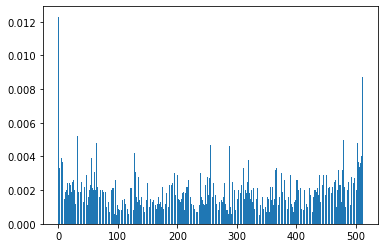

In [31]:

beta = 0.1
spins = np.random.choice([1,-1], (L,L))
#spins = np.ones((L,L))
spinCfg = SpinsCfg(spins.copy(), beta)
for sweep in range(20):
    for step in range(N):
        spinCfg.Step()
cfgCountMC = np.zeros(2**N)
cfgAll = np.arange(2**N)
for sweep in range(10000):
    for step in range(N):
        spinCfg.Step()
    spinInt = Cfg2Int(spinCfg.spins)
    cfgCountMC[spinInt] += 1
cfgMProbMC = cfgCountMC / np.sum(cfgCountMC)
plt.bar(cfgAll, cfgMProbMC)

cfgEnergy
cfgProbTheory
cfgEnergyTheory

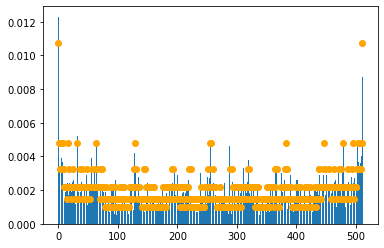

In [32]:
cfgEnergyTheory = np.zeros(2**N)
cfgAll = np.arange(2**N)
beta = 0.1
for i in range(2**N):
    spinTemp = Int2Cfg(i,L)
    cfgTemp = SpinsCfg(spinTemp, beta)
    cfgEnergyTheory[i] = cfgTemp.Energy()
cfgProbTheory = np.exp(-cfgEnergyTheory*beta)
cfgProbTheory = cfgProbTheory/np.sum(cfgProbTheory)
plt.bar(cfgAll,cfgMProbMC)
plt.scatter(cfgAll, cfgProbTheory, color='orange')

Monte Carlo Distribution

In [33]:
L=27
N = L * L
#spins = np.random.choice([1,-1], (L,L))
spinsAllUp = np.ones((L,L))
tao = 4
energyDistributionMC = []
mSqrDistributionMC = []
snapShotOverBetanMC = []
betaArray = np.zeros(12)
betaArray[:11] = np.linspace(0,1,11)
betaArray[11] = 10
for beta in betaArray:
    spinCfg = SpinsCfg(spinsAllUp.copy(), beta)
    for sweep in range(20):
        for step in range(N):
            spinCfg.Step()
    energyTemp = []
    msqrTemp = []
    for step in range(10000):
        for step in range(tao):
            spinCfg.Step()
        energyTemp.append(spinCfg.Energy())
        msqrTemp.append(spinCfg.MSqr())
    snapShotOverBetanMC.append(spinCfg.spins)

    energyDistributionMC.append(np.array(energyTemp))
    mSqrDistributionMC.append(np.array(msqrTemp))

energyDistributionMC = np.array(energyDistributionMC)
mSqrDistributionMC = np.array(mSqrDistributionMC)

Theoretical DIstribution

In [8]:
cfgProbDistributionTheory = np.zeros((betaArray.shape[0], 2**N))
cfgEnergyDistributionTheory = np.zeros((betaArray.shape[0], 2**N))
cfgMSqrDistributionTheory = np.zeros((betaArray.shape[0], 2**N))
for b in range(betaArray.shape[0]):
    for i in range(2**N):
        spinTemp = Int2Cfg(i,L)
        cfgTemp = SpinsCfg(spinTemp, betaArray[b])
        cfgEnergyDistributionTheory[b,i] = cfgTemp.Energy()
        cfgMSqrDistributionTheory[b,i] = cfgTemp.MSqr()
cfgProbDistributionTheory = np.exp(-cfgEnergyDistributionTheory * betaArray.reshape(-1,1))

cfgProbDistributionTheory = cfgProbDistributionTheory/np.sum(cfgProbDistributionTheory, axis=1).reshape(-1,1)

ValueError: Maximum allowed dimension exceeded

Theoretical beta=0 and inf

In [56]:
energyMeanTheory0 = 0
mSqrMeanTheory0 = 0
energyMeanTheoryInf = 0
mSqrMeanTheoryInf = 1

Plot Monte Carlo E and M^2

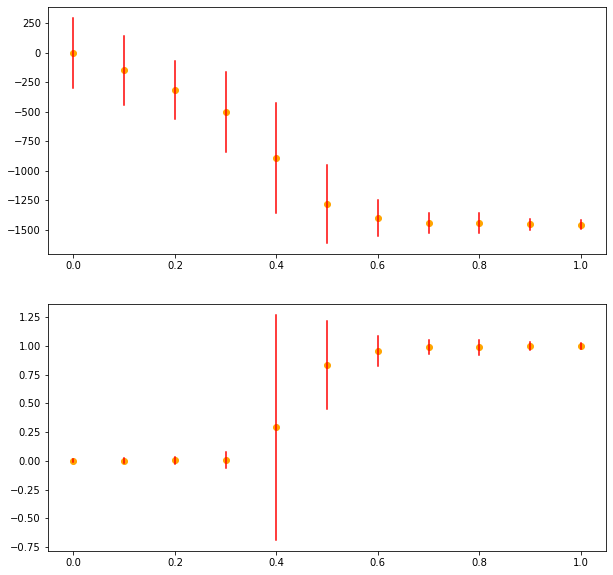

In [8]:
energyMeanMC = np.mean(energyDistributionMC, axis=1)
energyStdMC = np.sum((energyDistributionMC - energyMeanMC.reshape(-1,1))**2, axis=1)**0.5 / (N / tao)**0.5


mSqrMeanMC = np.mean(mSqrDistributionMC, axis=1)
mSqrStdMC = np.sum((mSqrDistributionMC - mSqrMeanMC.reshape(-1,1))**2, axis=1)**0.5 / (N / tao)**0.5

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax1.scatter(betaArray[:-1], energyMeanMC[:-1], color='orange')
for i in range(betaArray.shape[0]-1):
    ax1.plot([betaArray[i],betaArray[i]],[energyMeanMC[i]+energyStdMC[i], energyMeanMC[i]-energyStdMC[i]],color='red')

ax2 = plt.subplot(212)
ax2.scatter(betaArray[:-1], mSqrMeanMC[:-1], color='orange')
for i in range(betaArray.shape[0]-1):
    ax2.plot([betaArray[i],betaArray[i]],[mSqrMeanMC[i]+mSqrStdMC[i], mSqrMeanMC[i]-mSqrStdMC[i]],color='red')

[0.00129689 0.00170272 0.00346377 0.00726429 0.29187373 0.83443928
 0.95695778 0.98755071 0.98857146 0.99688529 0.99849474 1.        ]
[   -4.1852  -148.2208  -317.7224  -504.5636  -888.1388 -1281.9012
 -1400.766  -1440.3576 -1442.8584 -1453.5412 -1455.9324 -1458.    ]


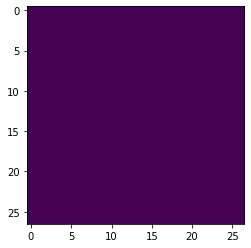

In [83]:

plt.imshow(snapShotOverBetanMC[11])
print(mSqrMeanMC)
print(energyMeanMC)

Plot Theoretical E and M^2 for small L

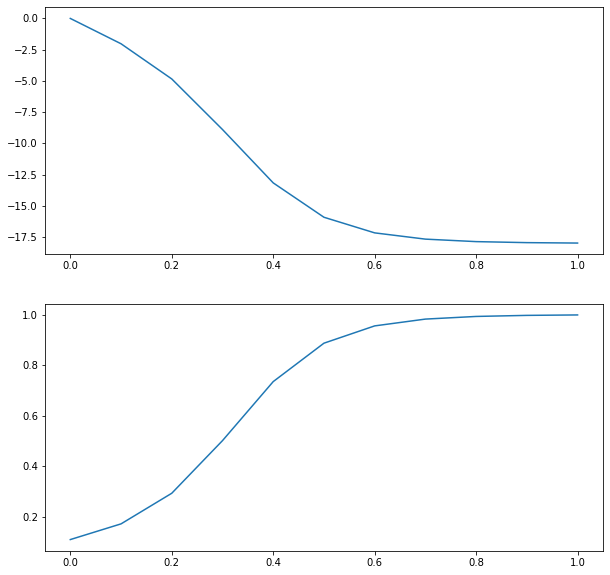

In [13]:
energyMeanTheory = np.sum(cfgProbDistributionTheory * cfgEnergyDistributionTheory, axis=1)
mSqrMeanTheory = np.sum(cfgProbDistributionTheory * cfgMSqrDistributionTheory, axis=1)
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax1.plot(betaArray[:-1], energyMeanTheory[:-1])
ax2 = plt.subplot(212)
ax2.plot(betaArray[:-1], mSqrMeanTheory[:-1])

Plot monte carlo P(E)

(1,)


<BarContainer object of 1 artists>

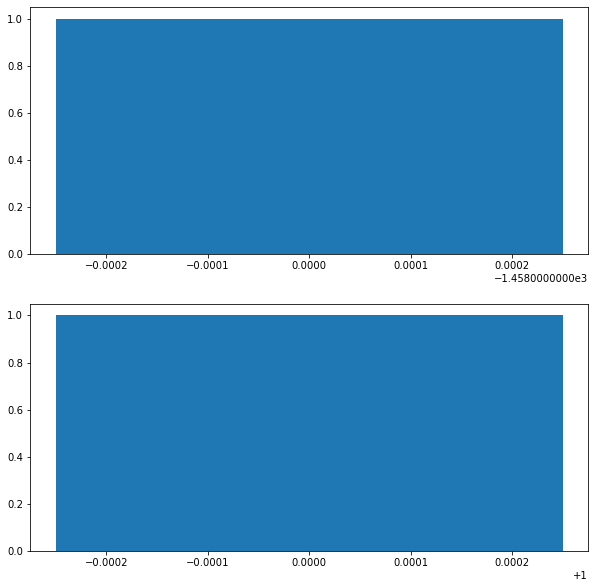

In [54]:
betaIndex = 11

energyUniqueMC = np.unique(energyDistributionMC[betaIndex,:])
energyProbMC = np.zeros_like(energyUniqueMC)

mSqrUniqueMC = np.unique(mSqrDistributionMC[betaIndex,:])
mSqrProbMC = np.zeros_like(mSqrUniqueMC)

for i in range(mSqrProbMC.shape[0]):
    for j in range(mSqrDistributionMC.shape[1]):
        if mSqrUniqueMC[i] == mSqrDistributionMC[betaIndex,j]:
            mSqrProbMC[i] += 1/mSqrDistributionMC.shape[1]

for i in range(energyProbMC.shape[0]):
    for j in range(energyDistributionMC.shape[1]):
        if energyUniqueMC[i] == energyDistributionMC[betaIndex,j]:
            energyProbMC[i] += 1/energyDistributionMC.shape[1]

figure = plt.figure(figsize=(10,10))
print(energyUniqueMC.shape)


ax1 = plt.subplot(211)
ax1.scatter(energyMeanMC[betaIndex],0.05, color='orange')
ax1.bar(energyUniqueMC, energyProbMC, width =0.0005)
ax2 = plt.subplot(212)
ax2.bar(mSqrUniqueMC, mSqrProbMC, width = 0.0005)

Plot Theoretical P(E), P(M^2)

In [11]:
betaIndex = 0

energyUniqueTheory = np.unique(cfgEnergyDistributionTheory[betaIndex,:])
energyProbTheory = np.zeros_like(energyUniqueTheory)

mSqrUniqueTheory = np.unique(cfgMSqrDistributionTheory[betaIndex,:])
mSqrProbTheory = np.array(np.zeros_like(mSqrUniqueTheory))

for i in range(energyProbTheory.shape[0]):
    for j in range(cfgEnergyDistributionTheory.shape[1]):
        if energyUniqueTheory[i] == cfgEnergyDistributionTheory[betaIndex,j]:
            energyProbTheory[i] += cfgProbDistributionTheory[betaIndex,j]
for i in range(mSqrProbTheory.shape[0]):
    for j in range(cfgMSqrDistributionTheory.shape[1]):
        if mSqrUniqueTheory[i] == cfgMSqrDistributionTheory[betaIndex,j]:
            mSqrProbTheory[i] += cfgProbDistributionTheory[betaIndex,j]
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax1.bar(energyUniqueTheory, energyProbTheory)
ax2 = plt.subplot(212)
ax2.bar(mSqrUniqueTheory, mSqrProbTheory, width=0.05)

NameError: name 'cfgEnergyDistributionTheory' is not defined

Get specific heat

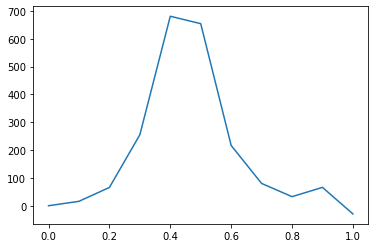

In [10]:
from scipy.interpolate import UnivariateSpline
energyMeanSpline = UnivariateSpline(betaArray[:-1], energyMeanMC[:-1], k=2)
dEOverdBeta = energyMeanSpline.derivative()
dBetaOverdTemp = -betaArray[:-1]**2
specificHeatOverBeta = dBetaOverdTemp * dEOverdBeta(betaArray[:-1])
plt.plot(betaArray[:-1], specificHeatOverBeta)

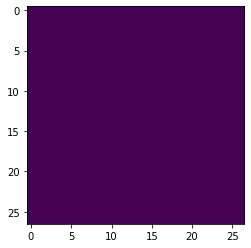

In [86]:

plt.imshow(snapShotOverBetanMC[11])

Coarse Grain

In [57]:
def Coarse(spins):
    spinMean = np.zeros((spins.shape[0]//3, spins.shape[0]//3))
    for i in range(spins.shape[0] // 3):
        for j in range(spins.shape[0] // 3):
            for di in range(3):
                for dj in range(3):
                    spinMean[i,j] += spins[i*3+di, j*3+dj] / 9
    spinOutput = np.where(spinMean>0,1,-1)
    return spinOutput

In [63]:
L=81
N = L * L
tao = 4

spinsAllUp = np.ones((L,L))

tao = 4
betaJArray = np.array([0.0,0.3,0.4,0.5,0.6,10])
snapSHotOverBetaCG = []

for i in range(betaJArray.shape[0]):
    betaJ = betaJArray[i]
    spinCfg = SpinsCfg(spinsAllUp.copy(), betaJ)
    for sweep in range(20):
        for step in range(N):
            spinCfg.Step()
            
    for step in range(10000):
        for step in range(tao):
            spinCfg.Step()
    snapSHotOverBetaCG.append([])
    snapSHotOverBetaCG[i].append(spinCfg.spins)
    snapSHotOverBetaCG[i].append(Coarse(spinCfg.spins))
    snapSHotOverBetaCG[i].append(Coarse(Coarse(spinCfg.spins)))

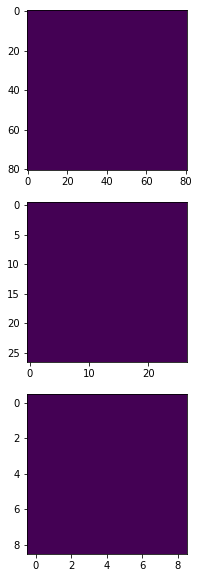

In [71]:
betaIndex = 5
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
ax1.imshow(snapSHotOverBetaCG[betaIndex][0])
ax1 = plt.subplot(312)
ax1.imshow(snapSHotOverBetaCG[betaIndex][1])
ax1 = plt.subplot(313)
ax1.imshow(snapSHotOverBetaCG[betaIndex][2])

In [84]:
L=81
N = L * L
tao = 4

spinsAllUp = np.ones((L,L))
spinsAllUpRef = np.ones((L//3, L//3))

tao = 4
mSqrDistributionMCRef = []
mSqrDistributionMCCG = []
betaJArray = np.array([0.0,0.3,0.4,0.5,0.6,10])


for betaJ in betaJArray:
    spinCfg = SpinsCfg(spinsAllUp.copy(), betaJ)
    spinCfgRef = SpinsCfg(spinsAllUpRef.copy(), betaJ)
    for sweep in range(20):
        for step in range(N):
            spinCfg.Step()
            spinCfgRef.Step()
            
    msqrTempRef = []
    msqrTempCG = []
    for step in range(10000):
        for step in range(tao):
            spinCfg.Step()
            spinCfgRef.Step()
        spinCfgCG = SpinsCfg(Coarse(spinCfg.spins), betaJ)
        msqrTempCG.append(spinCfgCG.MSqr())
        spinCfgCG2 = SpinsCfg(Coarse(spinCfgCG.spins), betaJ)
        msqrTempRef.append(spinCfgRef.MSqr())
    mSqrDistributionMCCG.append(np.array(msqrTempCG))
    mSqrDistributionMCRef.append(np.array(msqrTempRef))

mSqrDistributionMCCG = np.array(mSqrDistributionMCCG)
mSqrDistributionMCRef = np.array(mSqrDistributionMCRef)

Text(0.5, 1.0, 'native')

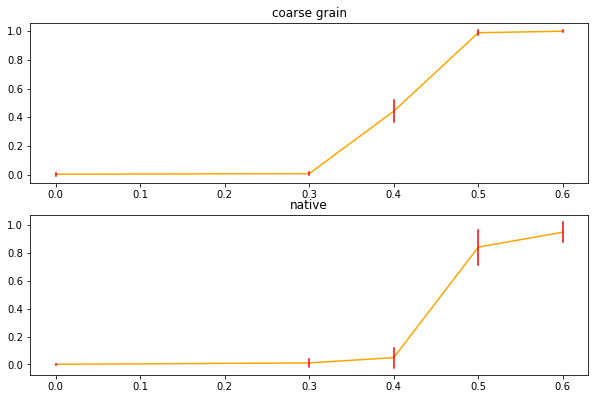

In [88]:
mSqrMeanMCCG = np.mean(mSqrDistributionMCCG, axis=1)
mSqrStdMCCG = np.sum((mSqrDistributionMCCG - mSqrMeanMCCG.reshape(-1,1))**2, axis=1)**0.5 / (N / tao)**0.5
mSqrMeanMCNative = np.mean(mSqrDistributionMCRef, axis=1)
mSqrStdMCNative = np.sum((mSqrDistributionMCRef - mSqrMeanMCNative.reshape(-1,1))**2, axis=1)**0.5 / (N / tao)**0.5


fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
ax1.plot(betaJArray[:-1], mSqrMeanMCCG[:-1], color='orange')
ax1.set_title('coarse grain')
for i in range(betaJArray.shape[0]-1):
    ax1.plot([betaJArray[i],betaJArray[i]],[mSqrMeanMCCG[i]+mSqrStdMCCG[i], mSqrMeanMCCG[i]-mSqrStdMCCG[i]],color='red')

ax2 = plt.subplot(312)
ax2.plot(betaJArray[:-1], mSqrMeanMCNative[:-1], color='orange')
for i in range(betaJArray.shape[0]-1):
    ax2.plot([betaJArray[i],betaJArray[i]],[mSqrMeanMCNative[i]+mSqrStdMCNative[i], mSqrMeanMCNative[i]-mSqrStdMCNative[i]],color='red')
ax2.set_title('native')



[0.00116369 0.01099262 0.04904161 0.83962598 0.94585882 1.        ]
[0.00350642 0.00736762 0.4422501  0.9885658  0.99894951 1.        ]
[ 0.071505    0.18935705  0.44973644  8.01479239  9.81761344 10.        ]
[ 0.   0.3  0.4  0.5  0.6 10. ]


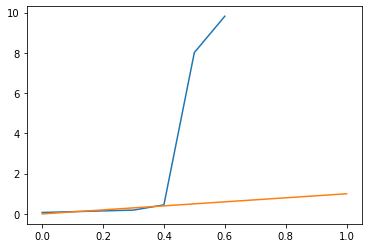

In [97]:
from scipy.interpolate import interp1d
print(mSqrMeanMCNative)
print(mSqrMeanMCCG)
mSqrMeanMCNativeInterp = interp1d(mSqrMeanMCNative, betaJArray)
betaJReverse = mSqrMeanMCNativeInterp(mSqrMeanMCCG)
print(betaJReverse)
print(betaJArray)
plt.plot(betaJArray[:-1],betaJReverse[:-1])
plt.plot([0,1],[0,1])